<a href="https://colab.research.google.com/github/joohoshin/MLDL_Basic/blob/master/8_3_Regression2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Regression

In [1]:
# 앞의 강의와 동일한 데이터
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt', sep='\s+', header=None ) # \s+는 space 나 tab 이 섞여있을 때

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

# 1. CRIM      per capita crime rate by town
# 2. ZN        proportion of residential land zoned for lots over 
#                  25,000 sq.ft.
# 3. INDUS     proportion of non-retail business acres per town
# 4. CHAS      Charles River dummy variable (= 1 if tract bounds 
#                  river; 0 otherwise)
# 5. NOX       nitric oxides concentration (parts per 10 million)
# 6. RM        average number of rooms per dwelling
# 7. AGE       proportion of owner-occupied units built prior to 1940
# 8. DIS       weighted distances to five Boston employment centres
# 9. RAD       index of accessibility to radial highways
# 10. TAX      full-value property-tax rate per $10,000
# 11. PTRATIO  pupil-teacher ratio by town
# 12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
#                  by town
# 13. LSTAT    % lower status of the population
# 14. MEDV     Median value of owner-occupied homes in $1000s

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:

X = df[['RM', 'AGE', 'DIS']].values   # values를 사용하면 데이터프레임의 데이터만 가져온다 (인덱스명과 컬럼명 제외, 판다스 데이터 프레임은 데이터를 numpy array로 반환)
y = df.MEDV.values

In [3]:
print(X.shape)
print(y.shape)

(506, 3)
(506,)


In [4]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X,y)
print(mlr.coef_)
print(mlr.intercept_)
print(mlr.score(X,y))


[ 8.4406291  -0.09941823 -0.48038409]
-21.87278779247286
0.5355978698785334


# 모델 성능 평가
테스트 셋을 통해 성능을 확인해봅시다

In [5]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.MEDV.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


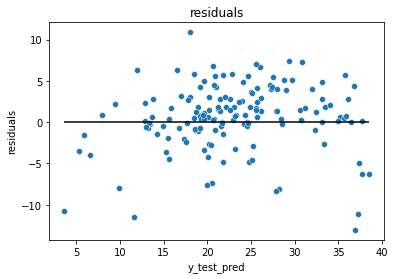

In [6]:
# testset의 resudual을 구해봅시다
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(y_test_pred, y_test_pred-y_test)
plt.title('residuals') # 타이틀
plt.xlabel('y_test_pred') # y축 제목
plt.ylabel('residuals') # x축 제목
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max())  # 수평선 그리기
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


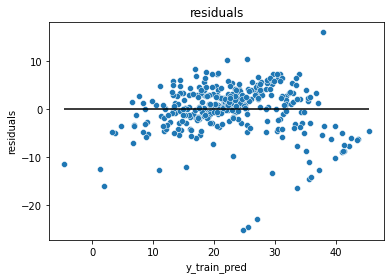

In [7]:
# trainset의 resudual을 구해서 비교해봅시다
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(y_train_pred, y_train_pred-y_train)
plt.title('residuals') # 타이틀
plt.xlabel('y_train_pred') # y축 제목
plt.ylabel('residuals') # x축 제목
plt.hlines(y=0, xmin=y_train_pred.min(), xmax=y_train_pred.max())  # 수평선 그리기
plt.show()

In [8]:
# 수치로 성능 평가

from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'train MSE: {mse_train:.2f}, test MSE: {mse_test:.2f}')

train MSE: 24.75, test MSE: 15.67


Tensorflow로 Multi Layer Perceptron 모델로 regression을 해봅시다

https://www.tensorflow.org/tutorials/keras/regression

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, optimizers

전처리를 해봅시다. 정규화/표준화는 대다수 알고리즘에서 적용해주는 것이 좋습니다. 

In [10]:
X_train_mean = X_train.mean(axis = 0)   # column별로 평균 및 표준편차 구하여 표준화, 축이 맞게 되어 있는지 확인할 것
X_train_std = X_train.std(axis = 0)

In [11]:
print(X_train_mean)
print(X_train_std)

[3.87614257e+00 1.17132768e+01 1.10870056e+01 7.34463277e-02
 5.55931921e-01 6.29047740e+00 6.87819209e+01 3.82863475e+00
 1.00310734e+01 4.13725989e+02 1.84740113e+01 3.56764294e+02
 1.28759887e+01]
[8.80976773e+00 2.42337748e+01 6.76109112e+00 2.60867715e-01
 1.15736719e-01 7.27512476e-01 2.81762714e+01 2.19530268e+00
 8.93426373e+00 1.71475472e+02 2.17163331e+00 8.90084628e+01
 7.45832593e+00]


In [12]:
# 데이터 정규화를 해줍니다. 딥러닝뿐 아니라 머신러닝 알고리즘에서 일반적으로 정규화/표준화를 거쳐주는 것이 좋습니다. 

def norm(x, mean, std):
  return (x - mean) / std
normed_X_train = norm(X_train, X_train_mean, X_train_std)
normed_X_test = norm(X_test, X_train_mean, X_train_std)

In [13]:
normed_X_train.shape

(354, 13)

In [14]:
normed_X_train.max()

9.659739060011598

In [15]:
normed_X_train.min()

-4.004611276846826

In [16]:
# mlp 모델 만들기

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[13]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.RMSprop()

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [18]:
EPOCHS = 30

history = model.fit(
  normed_X_train, y_train,
  epochs=EPOCHS, validation_split = 0.2
  )

Epoch 1/30
9/9 [==============================] - 1s 33ms/step - loss: 571.9990 - mae: 21.8965 - mse: 571.9990 - val_loss: 552.9799 - val_mae: 21.5292 - val_mse: 552.9799
Epoch 2/30
9/9 [==============================] - 0s 8ms/step - loss: 527.9323 - mae: 20.8440 - mse: 527.9323 - val_loss: 509.4570 - val_mae: 20.5018 - val_mse: 509.4570
Epoch 3/30
9/9 [==============================] - 0s 6ms/step - loss: 484.4896 - mae: 19.8138 - mse: 484.4896 - val_loss: 464.0807 - val_mae: 19.4048 - val_mse: 464.0807
Epoch 4/30
9/9 [==============================] - 0s 11ms/step - loss: 437.5537 - mae: 18.6478 - mse: 437.5537 - val_loss: 413.7007 - val_mae: 18.1886 - val_mse: 413.7007
Epoch 5/30
9/9 [==============================] - 0s 16ms/step - loss: 387.0553 - mae: 17.3117 - mse: 387.0553 - val_loss: 362.5874 - val_mae: 16.8820 - val_mse: 362.5874
Epoch 6/30
9/9 [==============================] - 0s 8ms/step - loss: 334.7826 - mae: 15.8929 - mse: 334.7826 - val_loss: 308.4398 - val_mae: 15.45

In [19]:
hist = pd.DataFrame(history.history)

hist

,loss,mae,mse,val_loss,val_mae,val_mse
0,571.998962,21.896450,571.998962,552.979858,21.529184,552.979858
1,527.932251,20.843992,527.932251,509.456970,20.501825,509.456970
2,484.489563,19.813759,484.489563,464.080719,19.404799,464.080719
3,437.553741,18.647776,437.553741,413.700745,18.188641,413.700745
4,387.055267,17.311659,387.055267,362.587372,16.881975,362.587372
5,334.782562,15.892949,334.782562,308.439819,15.451658,308.439819
6,282.256561,14.342430,282.256561,255.984924,13.958704,255.984924
7,231.110443,12.713347,231.110443,205.295837,12.408165,205.295837
8,183.262665,11.012378,183.262665,159.781570,10.753704,159.781570
9,142.056183,9.460634,142.056183,120.939095,9.077353,120.939095


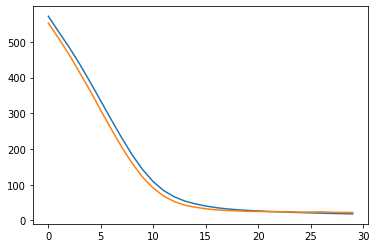

In [20]:
plt.plot(hist['mse'],label='Train Error')
plt.plot(hist['val_mse'],label = 'Val Error')

In [21]:
# prediction을 해봅시다. 
# 정규화를 해서 훈련하였으므로, prediction할때도 정규화 값을 넣습니다. 

y_test_pred = model.predict(normed_X_test)

In [22]:
y_test_pred.shape

(152, 1)

In [23]:

from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'test MSE: {mse_test:.2f}')

test MSE: 13.86


In [24]:
y_test.shape

(152,)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


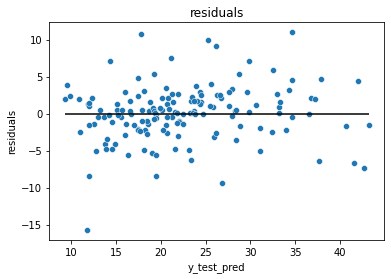

In [25]:
# testset의 resudual을 구해봅시다
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(y_test_pred[:,0], y_test_pred[:,0] - y_test)  # 출력 shape을 고려하여 연산
plt.title('residuals') # 타이틀
plt.xlabel('y_test_pred') # y축 제목
plt.ylabel('residuals') # x축 제목
plt.hlines(y=0, xmin=y_test_pred.min(), xmax=y_test_pred.max())  # 수평선 그리기
plt.show()